**Problem Statement:**

Let a finance company that gives loan ,analyses various details of a person before approving the loan. This company wants to automate this loan approval process. So the user who wants to get loan have to fill the online application form and based on the informations given by the user, need to develop a ML model that will tell the company if the person is eligible for the loan or not.

So, My aim of this project is to predict if a person is eligible for loan based on some informations like  Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others.



Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv("/work/train_u6lujuX_CVtuZ9i (1).csv")

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_dataset["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [6]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [7]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Missing Value Handling

In [10]:
# Dropping unecessary feature

data =loan_dataset.drop(['Loan_ID'], axis = 1)

In [11]:
# Mode imputation for categorical variable

data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [12]:
# Mean Imputation 

data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [13]:
# number of missing values in each column
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outlier Handling

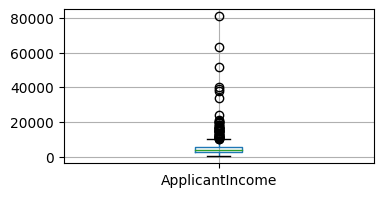

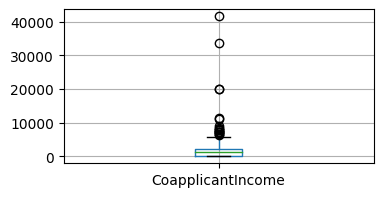

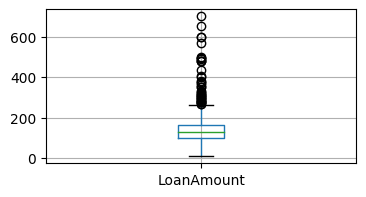

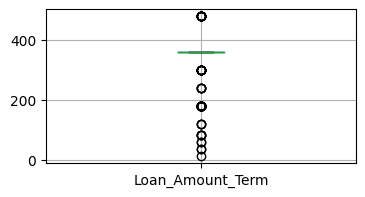

In [14]:
df=["ApplicantIncome","CoapplicantIncome", "LoanAmount","Loan_Amount_Term"]
for column in df:
    plt.figure(figsize=(4,2))
    data.boxplot([column])

In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

In [16]:
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]

/tmp/ipykernel_164/3410971170.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]
/tmp/ipykernel_164/3410971170.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]


In [17]:
data.shape

(396, 12)

**Label Encoding for target variable**

In [18]:
# label encoding
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [19]:
# printing the first 5 rows of the dataframe
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [20]:
# Dependent column values
data['Dependents'].value_counts()

0     245
2      64
1      62
3+     25
Name: Dependents, dtype: int64

In [21]:
# replacing the value of 3+ to 4
data = data.replace(to_replace='3+', value=4)

In [22]:
# dependent values
data['Dependents'].value_counts()

0    245
2     64
1     62
4     25
Name: Dependents, dtype: int64

# EDA

In [23]:
married_counts = data['Married'].value_counts()
df_married = pd.DataFrame(married_counts).reset_index()
df_married = df_married.rename(columns={"index": "married", "Married": "count"})
df_married

,married,count
0,Yes,255
1,No,141


In [25]:
graduate_counts = data['Education'].value_counts()
df_graduate = pd.DataFrame(graduate_counts).reset_index()
df_graduate = df_graduate.rename(columns={"index": "education", "Education": "count"})
df_graduate


,education,count
0,Graduate,310
1,Not Graduate,86


## Data Visualization

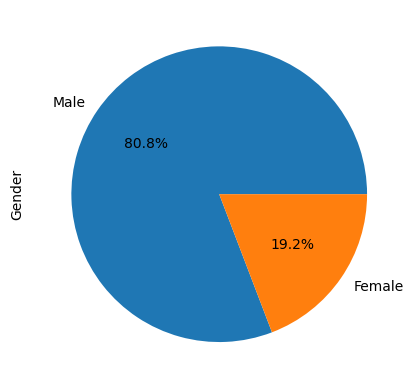

In [26]:
data["Gender"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<AxesSubplot: >

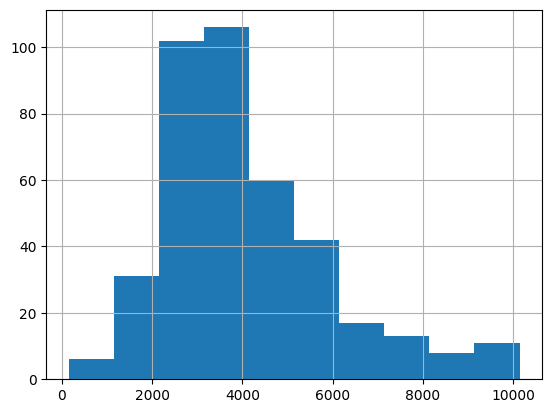

In [27]:
data['ApplicantIncome'].hist()

<AxesSubplot: >

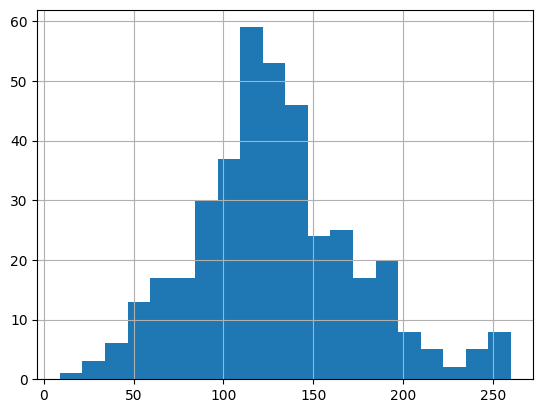

In [60]:
data['LoanAmount'].hist(bins=20)

<AxesSubplot: >

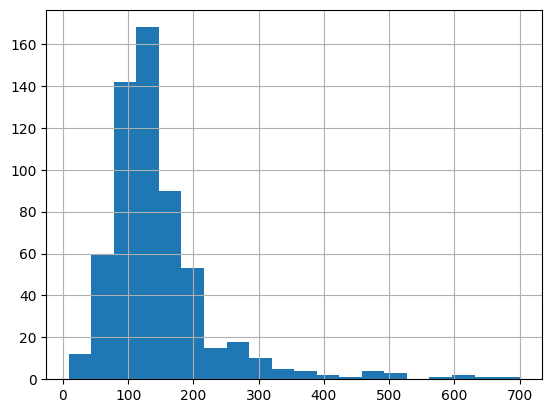

In [61]:
loan_dataset['LoanAmount'].hist(bins=20)

Here we can see that the initial dataset was right-skewed. So, to transform this into a normal distribution, we can use log transformation-

loan_dataset["Loan Amount_log"]=np.log( loan_dataset["LoanAmount"])

To visualize the new column-

loan_dataset["Loan Amount_log"].hist()

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

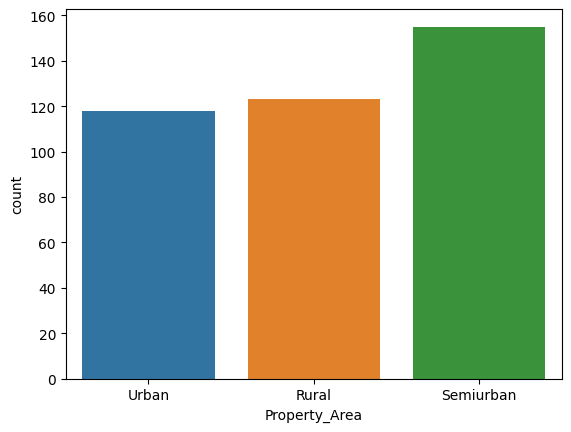

In [28]:
sns.countplot(x=data["Property_Area"])

There are more applicants from the semi-urban areas than from urban and rural.

<AxesSubplot: xlabel='Gender', ylabel='Loan_Status'>

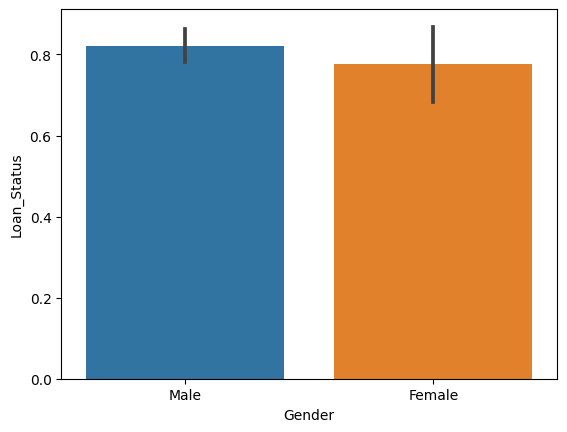

In [29]:
sns.barplot(x='Gender',y='Loan_Status',data=data)

Males have quite a higher chance to get loan than females.

<AxesSubplot: xlabel='Gender', ylabel='Credit_History'>

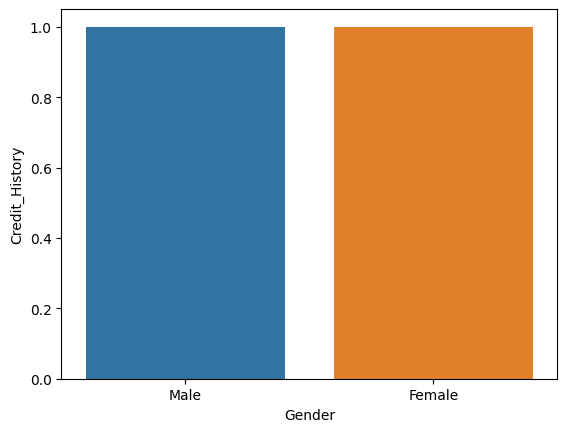

In [30]:
sns.barplot(x='Gender',y='Credit_History',data=data)

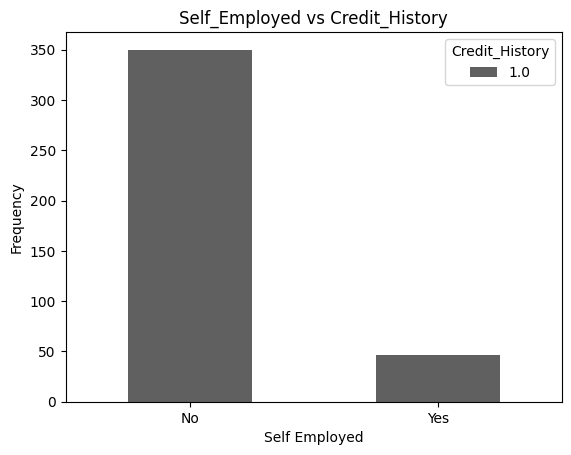

In [31]:
pd.crosstab(data.Self_Employed, data.Credit_History).plot(kind='bar', stacked=True, color=['#606060FF','#D6ED17FF'])

plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Self_Employed vs Credit_History')
plt.show()

Most not self employed applicants have good credit compared to self employed applicants.

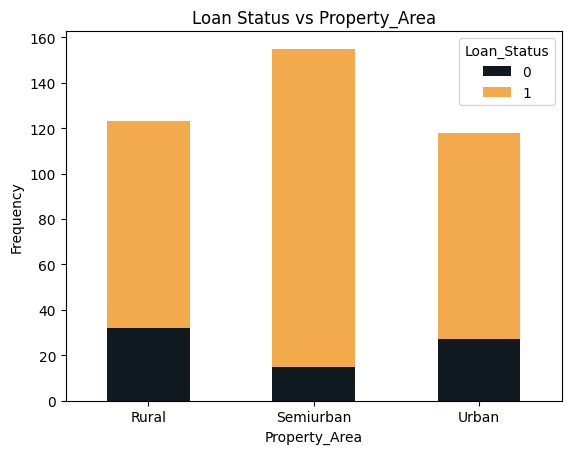

In [32]:
pd.crosstab(data.Property_Area, data.Loan_Status).plot(kind='bar', stacked=True, color=['#101820FF','#F2AA4CFF'])
plt.xlabel('Property_Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Loan Status vs Property_Area')
plt.show()

The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.

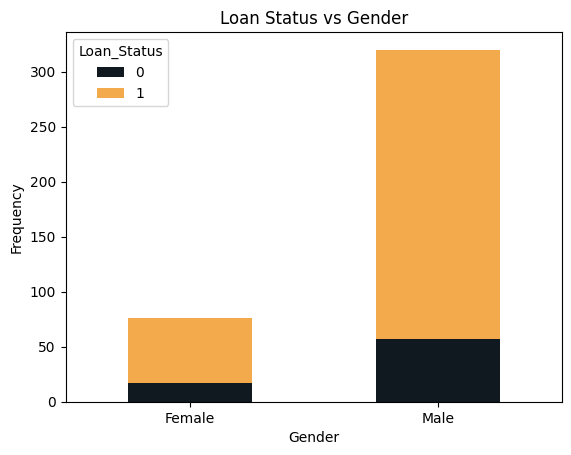

In [33]:
pd.crosstab(data.Gender, data.Loan_Status).plot(kind='bar', stacked=True, color=['#101820FF','#F2AA4CFF'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Loan Status vs Gender')
plt.show()

The proportion of loans getting approved for males is higher as compared to females. 

<AxesSubplot: xlabel='Education', ylabel='count'>

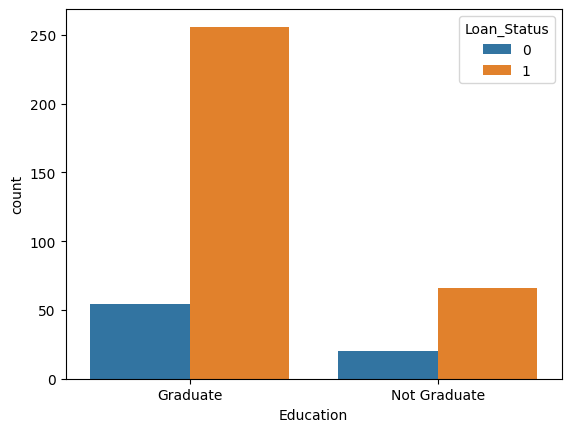

In [34]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=data)

Most loan approved for graduates. 

<AxesSubplot: xlabel='Married', ylabel='count'>

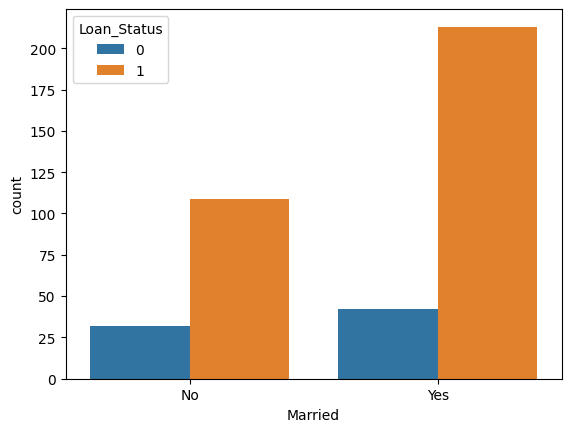

In [35]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=data)

Most loan approved for married persons. 

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

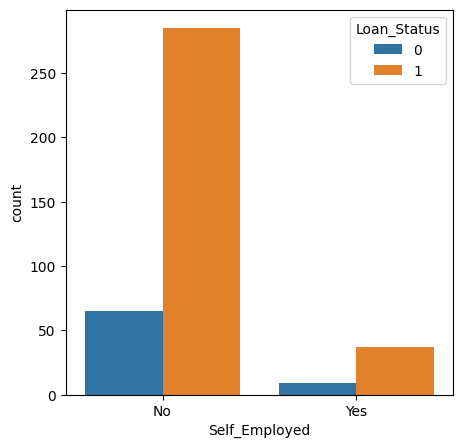

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Self_Employed'], hue=data['Loan_Status'], data=data)

The acceptance rate is also less for the Self-employed.

# Encoding

In [37]:
# convert categorical columns to numerical values
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [38]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             396 non-null    int64  
 1   Married            396 non-null    int64  
 2   Dependents         396 non-null    object 
 3   Education          396 non-null    int64  
 4   Self_Employed      396 non-null    int64  
 5   ApplicantIncome    396 non-null    int64  
 6   CoapplicantIncome  396 non-null    float64
 7   LoanAmount         396 non-null    float64
 8   Loan_Amount_Term   396 non-null    float64
 9   Credit_History     396 non-null    float64
 10  Property_Area      396 non-null    int64  
 11  Loan_Status        396 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 56.4+ KB


# Standarization

In [40]:
# separating the data and label
X = data.drop(columns=['Loan_Status'],axis=1)
Y = data['Loan_Status']

In [41]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
607       1        1          2          0              0             3987   
608       1        1          0          1              0             3232   
609       0        0          0          1              0             2900   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [42]:
from sklearn.preprocessing import StandardScaler

Std_Sc = StandardScaler()
X = Std_Sc.fit_transform(X)

# Prediction

## Train Test Split

In [43]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(396, 11) (356, 11) (40, 11)


## Logistic Regression

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")


81.18 %


## Decision Tree

In [46]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
print(round(acc_decision_tree,2,), "%")


72.5 %


## Random Forest

In [47]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")


77.5 %


## KNN

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
print(round(acc_knn,2,), "%")

70.0 %


## Support Vector Machine Model

In [49]:
classifier = svm.SVC(kernel='linear')

In [50]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [51]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [52]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8117977528089888


In [53]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = round(accuracy_score(X_test_prediction,Y_test)*100 ,2)

In [54]:
print('Accuracy on test data : ', round(test_data_accuracy, 2))

Accuracy on test data :  82.5


In [55]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest',
              'SVM', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest,test_data_accuracy, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
82.50,SVM
81.18,Logistic Regression
77.50,Random Forest
72.50,Decision Tree
70.00,KNN


**Observed that-**
1. before outlier handling, SVM and random forest were the best algorithms with 83% accuracy
2. after outlier handling , logistic regression( with 81%) was the best, then SVM (80%) and random forest(77%)
3. lastly after appling standarization, SVM is the best, but accuracy of decision tree decreased and accuracy for KNN increased by 5%

# Grid Search CV

In [56]:
from sklearn.model_selection import GridSearchCV

  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}
  
grid = GridSearchCV(classifier, param_grid, refit = True, scoring='accuracy')
  
# fitting the model for grid search
grid.fit(X_train, Y_train)


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='accuracy')

In [57]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


In [58]:
grid_predictions = grid.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      1.00      0.90        33

    accuracy                           0.82        40
   macro avg       0.41      0.50      0.45        40
weighted avg       0.68      0.82      0.75        40

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.

In [59]:
grid.score(X_test, Y_test)

0.825

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=526e13f8-bd20-444f-b8e6-86598b2eabbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>